In Google Drive, create the below folder structures and keep the model file and sample images accordingly.<br>
Colab Notebooks/chest-xray-pneumonia/output/MN_16_weights-014-0.2278.hdf5 <br>
Here model name you need to change in case you have build a new one. <br>
Colab Notebooks/chest-xray-pneumonia/sampleTest_Pictures/Normal.jpeg <br>
Colab Notebooks/chest-xray-pneumonia/sampleTest_Pictures/Pneumonia.jpeg <br>
Normal and Pneumonia pictures and the model defined above are shared in the course.


In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
mkdir output

In [ ]:
mkdir sampleTest_Pictures

In [ ]:
mkdir utils

In [ ]:
modelName = 'MN_16_weights-016-0.2087.hdf5'

In [ ]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/output/MN_16_weights-016-0.2087.hdf5' '/content/output'

In [ ]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/sampleTest_Pictures/Normal.jpeg' '/content/sampleTest_Pictures'

In [ ]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/sampleTest_Pictures/Pneumonia.jpeg' '/content/sampleTest_Pictures'

In [ ]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/utils/config.py' '/content/utils'

In [ ]:
# Importing the libraries
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from utils import config
import numpy as np
import argparse
import cv2
import os

In [ ]:
# Model Path
modelPath = config.outputPath + '/' + modelName

In [ ]:
# Setting the Paths
imagePath =  config.PROJ_PATH + "/sampleTest_Pictures/Pneumonia.jpeg"

In [ ]:
# Loading the Pneumonia detector model

print("Loading Pneumonia detector model...")
model = load_model(modelPath)

Loading Pneumonia detector model...


In [ ]:
# Loading the input image
image = cv2.imread(imagePath)

RESULT :pneumonia: 77.89%


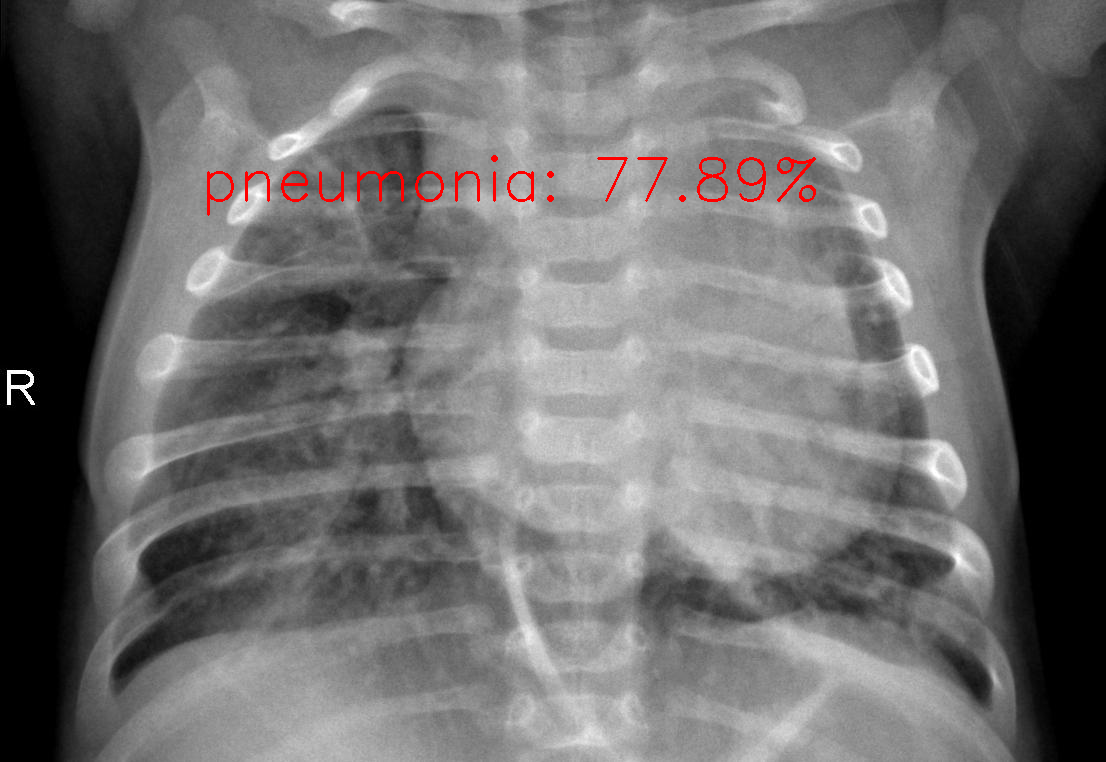

In [ ]:
# Convert it from BGR to RGB channel ordering, resize it to 224x224, and preprocess it
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image1 = cv2.resize(image1, (224, 224))

image1 = img_to_array(image1)
image1 = preprocess_input(image1)
image1 = np.expand_dims(image1, axis=0)

# Pass the image through the model to determine if the person has pneumonia
(normal, pneumonia) = model.predict(image1)[0]


# Determine the class label and so the color we will use to add text
label = "normal" if normal > pneumonia else "pneumonia"
color = (0, 255, 0) if label == "normal" else (0, 0, 255)

# Adding the probability in the label
label = "{}: {:.2f}%".format(label, max(normal, pneumonia) * 100)

# Displaying the label on the output image
cv2.putText(image, label, (200, 200),
            cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)
        
# Showing the output image
print("RESULT :" +label)
cv2_imshow(image)
# cv2.waitKey(0)